# Importação dos recursos

In [2]:
import numpy as np
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as k
from tensorflow.keras.preprocessing.image import ImageDataGenerator # classe para Data Augmentation

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Pré-processamento dos dados

In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
# normalização dos atributos previsores:
X_train, X_test = X_train / 255.0, X_test / 255.0

# redimensionalização dos conjuntos de classe:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [6]:
y_train.shape, y_test.shape

((50000,), (10000,))

# Construção do modelo

In [7]:
# captura o número de classes distintas no dataset:
K = len(set(y_test))
K

10

In [8]:
k.clear_session()
i = Input(shape = X_train[0].shape)

"""
# 3 blocos repetidos serão usado, cada um com a seguinte estrutura: 
2 camadas convolusão sem stride (porque as imagens são pequenas) com
BatchNorm entre elas, finalizado por um MaxPoooling.
O padrão de 2 Conv2D antes do MaxPooling é retirado do modelo VGG.
O número de kernels dobra a cada bloco.
O padding usado é no modo 'same', também pelo tamanho reduzido das imagens,
que não poderiam passar por tantas convoluções com padding 'valid'.
"""
# 1° bloco:
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2, 2))(x)

# 2° bloco:
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# 3° bloco:
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Rede Neural Densa:
# flattening (Global Pooling não é necessário pois as imagens de input têm sempre as mesmas dimensões):
x = Flatten()(x) # camada flattened, de input à Rede Densa
x = Dropout(0.2)(x) # add um dropout de 20% à camada de entrada da Rede Densa
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x) # add um dropout de 20% à primeira camada oculta da Rede Densa
x = Dense(K, activation = 'softmax')(x) # camada de saída com K neurônios e ativação probabilistica softmax

In [9]:
classifier = Model(i, x) # constrói um modelo funcional de 1 input e 1 output

In [10]:
# compilação do modelo:
classifier.compile(optimizer = 'adam', 
                   loss = 'sparse_categorical_crossentropy', # pois é um problema multiclasse sem One-Hot
                  metrics = ['accuracy'])

In [11]:
# treinamento da rede, ainda sem data augmentation:
r = classifier.fit(X_train, y_train, validation_data = (X_test, y_test),
                  epochs = 50) # batch_size default, usado, é de 32

Epoch 1/50


I0000 00:00:1726442351.140606    2738 service.cc:145] XLA service 0x7e2338007ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726442351.140677    2738 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  35/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1868 - loss: 5.2704 

I0000 00:00:1726442357.604538    2738 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.4493 - loss: 1.7629 - val_accuracy: 0.6535 - val_loss: 0.9884
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6974 - loss: 0.8709 - val_accuracy: 0.7097 - val_loss: 0.8560
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7629 - loss: 0.6812 - val_accuracy: 0.7666 - val_loss: 0.6833
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8042 - loss: 0.5727 - val_accuracy: 0.7887 - val_loss: 0.6206
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8364 - loss: 0.4711 - val_accuracy: 0.7963 - val_loss: 0.6360
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8616 - loss: 0.3999 - val_accuracy: 0.7994 - val_loss: 0.6411
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8831 - loss: 0.3362 - val_accuracy: 0.8024 - val_loss: 0.6387
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9032 - loss: 0.2779 - val_accura

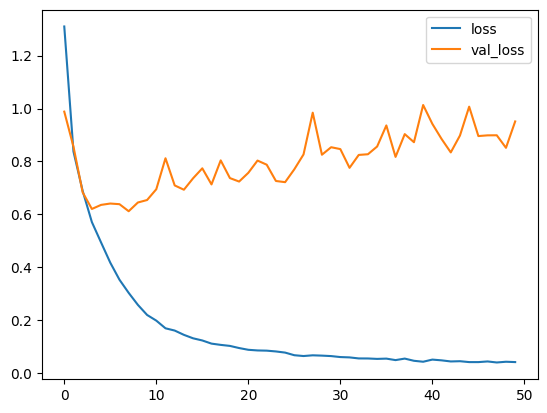

In [12]:
# visualizando os erros
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

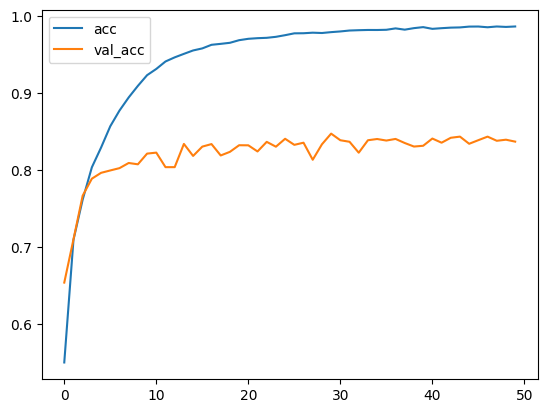

In [13]:
# visualizando as accuracies
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

Houve uma melhora considerável nos valores de precisão e erro para os dados de teste em relação ao modelo anterior, com menos camadas de convolução e sem Batch Normalization.<br>
Porém, ainda observa-se o padrão de estagnação de valuation_accuracy e um leve aumento de valuation loss enquanto loss diminui e accuracy aumenta. Ainda há fortes sinais de overfitting.

# Data Augmentation

Para lidar com o overfitting, usaremos data augmenation para aprimorar a Invariância Translacional do modelo.

## De onde parou

No Keras, se você treina o modelo com o método fit e depois chama fit_generator, o treinamento continua de onde parou. Ou seja, vamos treinar ainda mais um modelo já treinado.

In [16]:
batch_size = 32
data_generator = ImageDataGenerator( # retorna um construtor de um gerador para Data Augmentation
    width_shift_range = 0.1, # desloca a imagem horizontalmente em até 10%
    height_shift_range = 0.1, # desloca a imagem verticalmente em até 10%
    horizontal_flip = True # habilita a inversão horizontal da imagem
)
train_generator = data_generator.flow(X_train, y_train, batch_size) # retorna um gerador para os dados de treino, que serão gerados em batches de 32 imagens
steps_per_epoch = X_train.shape[0] // batch_size # calcula o número de iterações/atualizações de peso por epoch, retornando o maior inteiro menor ou igual a X_shape[0] / batch_size
r = classifier.fit(train_generator, validation_data = (X_test, y_test), 
                             steps_per_epoch=steps_per_epoch, epochs = 50)

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:42 181ms/step - accuracy: 0.9062 - loss: 0.4711

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8145 - loss: 0.6172 - val_accuracy: 0.8320 - val_loss: 0.5218
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9375 - loss: 0.4422

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.9375 - loss: 0.4422 - val_accuracy: 0.8340 - val_loss: 0.5172
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8568 - loss: 0.4357 - val_accuracy: 0.8434 - val_loss: 0.4894
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - accuracy: 0.8125 - loss: 0.6488 - val_accuracy: 0.8430 - val_loss: 0.4911
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8701 - loss: 0.3986 - val_accuracy: 0.8475 - val_loss: 0.4651
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.9688 - loss: 0.1643 - val_accuracy: 0.8474 - val_loss: 0.4665
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8767 - loss: 0.3729 - val_accuracy: 0.8513 - val_loss: 0.4527
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - accuracy: 0.9375 - loss: 0.1749 - val_accuracy: 0.8512 - val_loss: 0.4509
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8828 - loss: 0.35

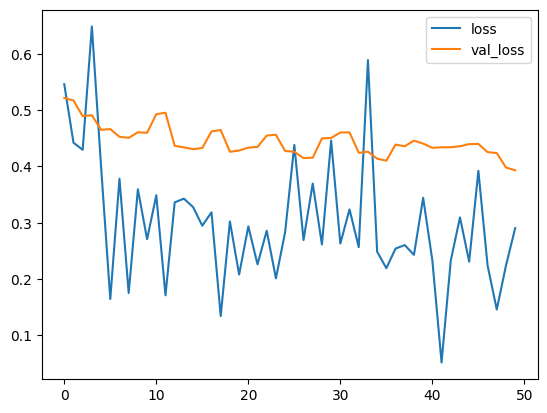

In [17]:
# visualizando os erros
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

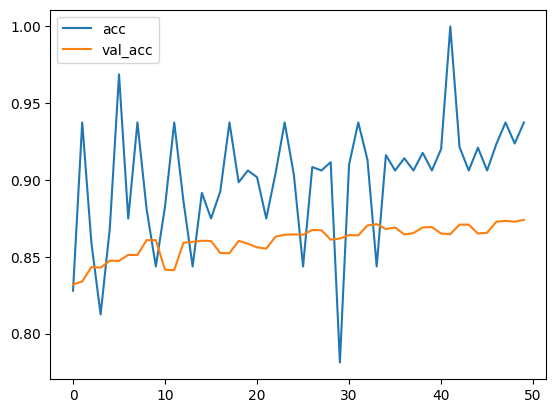

In [18]:
#visualizando as precisões
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

## Do zero

Agora, o treinamento com Data Augmentation será feito em um modelo não treinado.

In [19]:
k.clear_session()
i = Input(shape = X_train[0].shape)

# 1° bloco:
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# 2° bloco:
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# 3° bloco:
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Rede Neural Densa:
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

classifier = Model(i, x)
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                  metrics = ['accuracy'])

In [20]:
data_generator = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
r = classifier.fit(train_generator, validation_data = (X_test, y_test),
                        steps_per_epoch = steps_per_epoch,
                        epochs = 50)

Epoch 1/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.4157 - loss: 1.8296 - val_accuracy: 0.6350 - val_loss: 1.0524
Epoch 2/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step - accuracy: 0.5938 - loss: 1.1866 - val_accuracy: 0.6275 - val_loss: 1.0733
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.6298 - loss: 1.0471 - val_accuracy: 0.6734 - val_loss: 1.0029
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.5312 - loss: 1.2619 - val_accuracy: 0.6793 - val_loss: 0.9651
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.6997 - loss: 0.8703 - val_accuracy: 0.6893 - val_loss: 0.9687
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.5000 - loss: 1.2092 - val_accuracy: 0.6980 - val_loss: 0.9246
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7338 - loss: 0.7766 - val_accuracy: 0.7653 - val_loss: 0.6769
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - accuracy: 0.7188 -

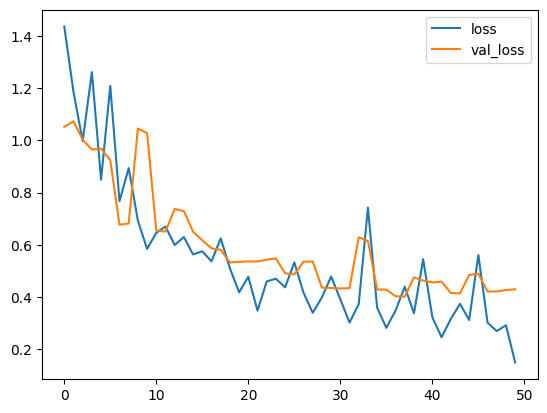

In [21]:
# visualizando os erros
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

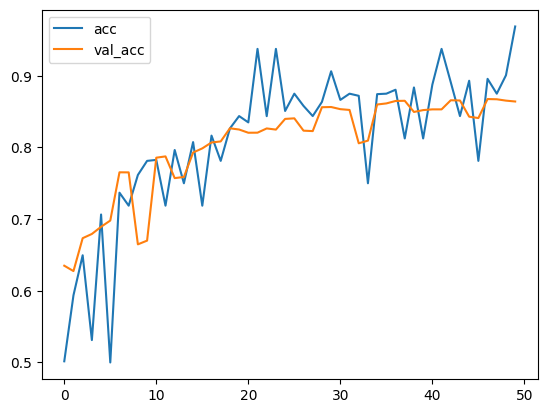

In [22]:
#visualizando as precisões
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

## Conclusão

Os resultados foram bem parecidos, mas ambos bem melhores do que a abordagem sem data augmentation.

# Visualizando a matriz de confusão

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Not normalized confusion matrix
[[881  10  21  14  10   0  15   1  28  20]
 [  4 954   0   4   1   0   6   0  10  21]
 [ 37   0 772  59  39  17  63   6   4   3]
 [ 10   3  26 823  23  31  66   6   5   7]
 [  4   1  26  25 871   5  53  11   4   0]
 [  3   1  18 221  31 680  30  10   3   3]
 [  3   1  10  28   4   1 952   0   1   0]
 [  8   0  15  52  37  12   9 859   3   5]
 [ 25   9   0   5   1   0  10   1 930  19]
 [  8  44   1  10   0   1   9   1   7 919]]


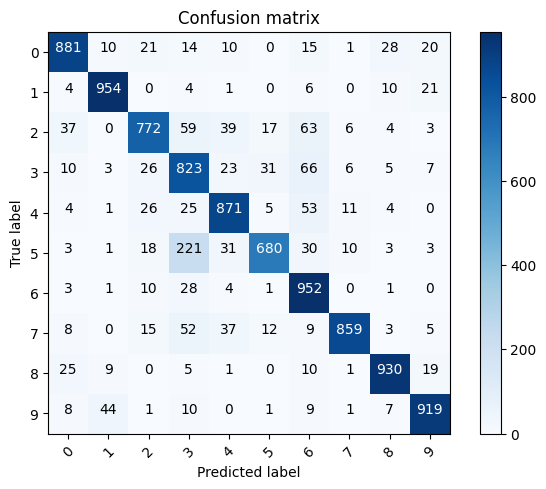

In [23]:
from itertools import product
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix',
                          cmap = plt.cm.Blues): # colormap padrão é o da escala de azul (claro a escuro)
    if normalize:
        """
        Divide cada linha da matriz pela soma de seus valores, 
        normalizando cada classe independentemente.
        """
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Not normalized confusion matrix")

    print(cm) # imprime a matriz
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap) # cria uma mapa de calor na escala de azul com os valores de cm e interpolação Nearest Neighbor
    plt.title(title) # adiciona o título à imagem do mapa
    plt.colorbar() # adiciona uma barra de cor para explicar o mapeamento cor-valor
    tick_marks = np.arange(len(set(y_test))) # cria um array de ticks (locais para rótulos) de 0 a K, sendo K o número de classes em y_test
    plt.xticks(tick_marks, classes, rotation = 45) # adiciona os rótulos das classes nas localizações dadas por tick_marks ao longo do eixo x, com uma inclinação de 45 graus
    plt.yticks(tick_marks, classes) # adiciona os rótulos das classes nas localizações dadas por tick_marks ao longo do eixo y
    
    fmt = '.2f' if normalize else 'd' # formatará os textos das células para float de 2 casas decimais se os dados estiverem normalizados, senão serão inteiros
    thresh = cm.max() / 2 # determina um limite para a posterior mudança de cor da fonte para melhor legibilidade
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])): # itera por todas as combinações de i e j ao longo do mapa cm
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout() # evita que as tick labels, legendas e título se sobreponham
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = classifier.predict(X_test).argmax(axis = 1) # retorna o índice do elemento de maior probabilidade em cada classe (linha, axis 1)
cm = confusion_matrix(y_test, p_test) # produz e retorna a matriz de confusão dados as classes corretas e previstas
plot_confusion_matrix(cm, list(range(10))) # chama a função criada com a matriz de confusão e uma lista de 0 a 9 (classes da Fashion MNIST)

In [24]:
# classes
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Ou seja, o modelo confundiu muito:
- 3 e 5 (gato e cachorro)
- 3 e 6 (gato e sapo)

Text(0.5, 1.0, 'Predicted label: cat  True label: dog')

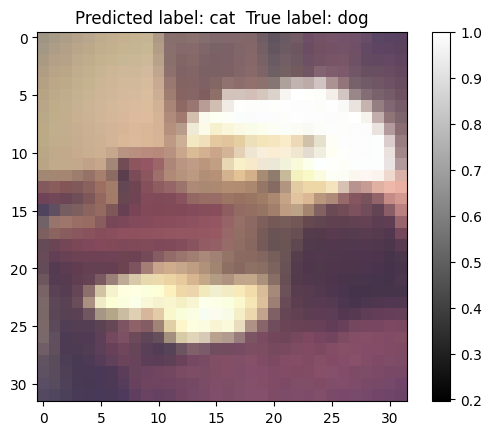

In [32]:
# mostrando um exemplo mal-classificado:
misclassified_idx = np.where(p_test != y_test)[0] # retorna um array com os índices de todas as amostras mal-classificadas
i = np.random.choice(misclassified_idx) # escolhe um índice aleatoriamente
plt.imshow(X_test[i], cmap='gray') # plota a imagem em escala de cinza
plt.colorbar()
plt.title(f'Predicted label: {labels[p_test[i]]}  True label: {labels[y_test[i]]}')

# Resumo do modelo

In [33]:
classifier.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)